# Bosten Housing Prices

## General
Housing Values in Suburbs of Boston. The **medv** variable is the target variable. <br>

<img  style="width:500px;height:300px;"src="house_pig.jpg" alt="Boston house">
<p>Source: http://www.houseandhammer.com/wp-content/uploads/2016/11/11cudworthmedford-750x429.jpg </p>

## Data description
The Boston data frame has 506 rows and 14 columns.This data frame contains the following columns:<br>
<ul>
 <li>
     **crim**: per capita crime rate by town.
 </li>
 <li>
     **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
 </li>
 <li>
     **indus**: proportion of non-retail business acres per town.
 </li>
 <li>
     **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
 </li>
 <li>
     **nox**: nitrogen oxides concentration (parts per 10 million).
 </li>
 <li>
     **rm**:average number of rooms per dwelling.
 </li>
 <li>
     **age**: proportion of owner-occupied units built prior to 1940.
 </li>
 <li>
     **dis **: weighted mean of distances to five Boston employment centres.
 </li>
 <li> 
     **rad**: index of accessibility to radial highways.
 </li>
 <li>
     **tax**: full-value property-tax rate per  \$10,000.
 </li>
 <li>
 **ptratio **: pupil-teacher ratio by town.
 </li>
 <li>
 **black **: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
 </li>
 <li>
 **lstat **: lower status of the population (percent).
 </li>
 <li>
 **medv **: median value of owner-occupied homes in \$1000s.
</ul>

 **Source **
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.




In [5]:
#1.Step Load the data:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML
#
import matplotlib.pyplot as plt
%matplotlib inline


boston.feature_names 
lower_case = lambda x:x.lower()
func_lower = np.vectorize(lower_case)
feature_names = func_lower(boston.feature_names)
print(feature_names)
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=feature_names)
df_boston['medv'] = pd.Series(boston.target)
df_boston.head()

display(df_boston.describe())


['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'b' 'lstat']


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


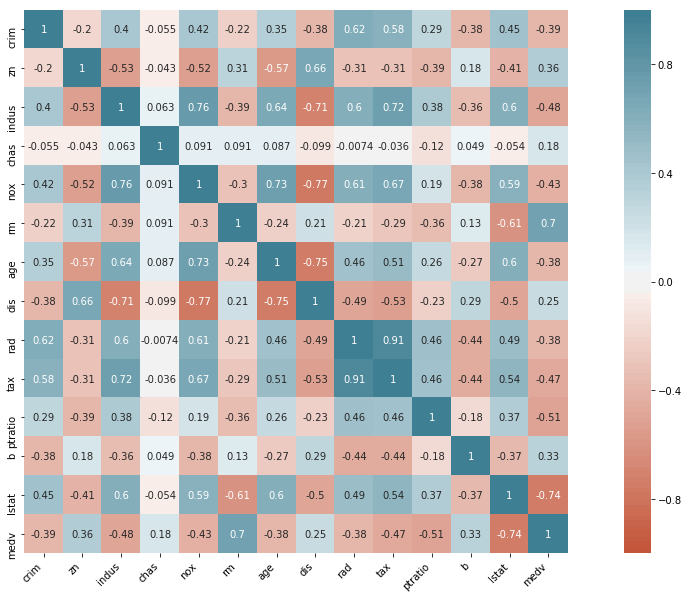

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.385832
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [6]:
plt.figure(figsize=(20,10))
corr = df_boston.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=100),
    annot=True, 
    fmt='.2g',
    square=True,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

correlations = df_boston.corr()
correlations = correlations['medv']
display(HTML('<h4>Pearson correlation coefficient for medv</h4>'))

display(
    correlations.sort_values()
)
display(
HTML("""
<h3> Finding </h3>
You can see that feature's: <br>
<ul>
<li>lstat  [lower status of the population (percent)] 
</li><li>
rm (average number of rooms)
</li><li>
ptratio (pupil-teacher ratio by town. )
</li>
</ul>
correlates quite strongly to the medv. Let’s use pandas to visualise this correlation further.

""")
)

In [12]:
!python --version


Python 3.6.4 :: Anaconda custom (64-bit)


In [15]:
for key,val in correlations.to_dict().items():
    print("key: {key} value: {value}".format(key=key,value=val))

key: lstat value: -0.7376627261740143
key: indus value: -0.483725160028373
key: tax value: -0.46853593356776646
key: rm value: 0.6953599470715389
key: chas value: 0.1752601771902975
key: age value: -0.3769545650045959
key: medv value: 1.0
key: dis value: 0.24992873408590394
key: b value: 0.33346081965706653
key: crim value: -0.38583168988399036
key: rad value: -0.3816262306397776
key: nox value: -0.4273207723732817
key: zn value: 0.3604453424505447
key: ptratio value: -0.507786685537561


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C06B628438>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

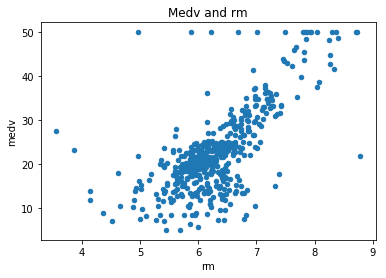

<Figure size 432x288 with 0 Axes>

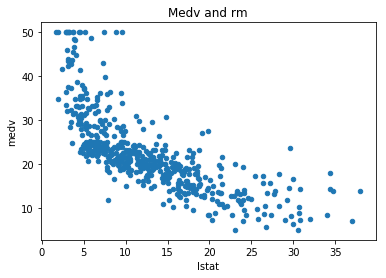

<Figure size 432x288 with 0 Axes>

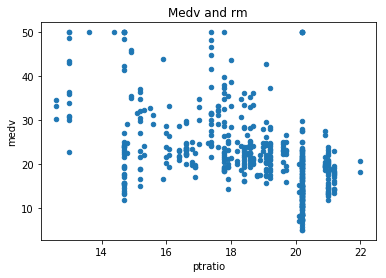

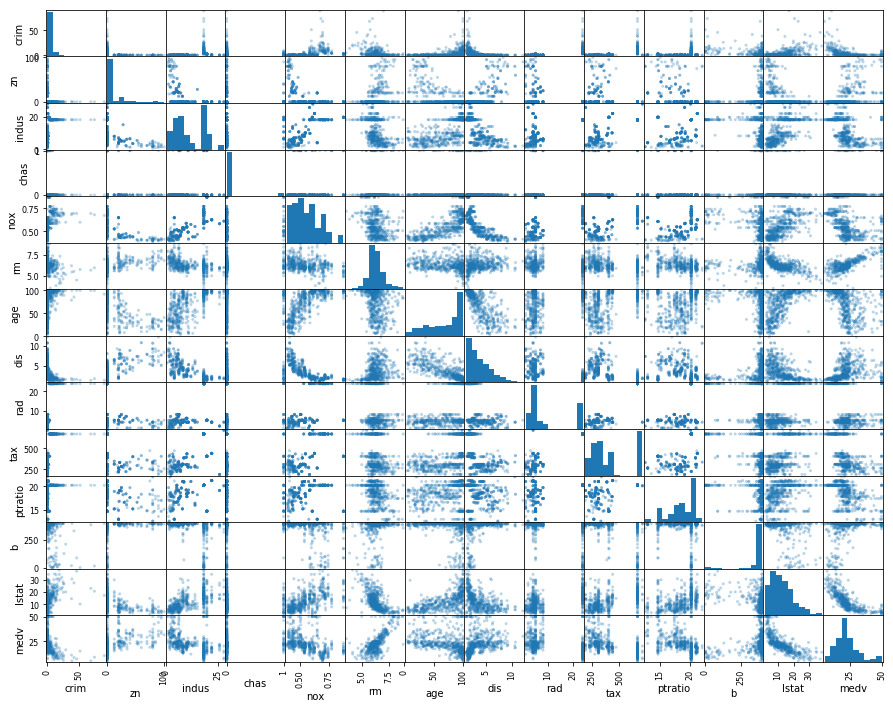

In [17]:
plt.figure()
df_boston.plot.scatter(x='rm', y='medv', title="Medv and rm")
plt.figure()
df_boston.plot.scatter(x='lstat', y='medv', title="Medv and rm")
plt.figure()
df_boston.plot.scatter(x='ptratio', y='medv', title="Medv and rm")


from pandas.plotting import scatter_matrix
scatter_matrix(df_boston,figsize=(15,12),alpha=0.3)

C:\anaconda\envs\python35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'FREQUENCY')

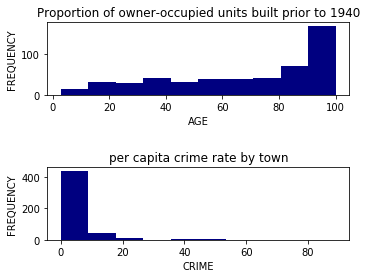

In [49]:
# Explore the data
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=1)
plt.subplot(211)
#===== AGE
plt.subplot(2, 1, 1)
df_boston['AGE'].plot.hist(title='Proportion of owner-occupied units built prior to 1940',
                            colormap='jet')
plt.xlabel('AGE')
plt.ylabel('FREQUENCY')
#===== 
plt.subplot(2, 1, 2)
df_boston['CRIM'].plot.hist(title="per capita crime rate by town",
                           colormap="jet"
                           )
plt.xlabel("CRIME")
plt.ylabel("FREQUENCY")


